In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

In [ ]:
data=pd.read_excel('/content/drive/MyDrive/공모전/로그파일2.xlsx')

In [ ]:
data.head()

,Date,누적확진자수,거리두기단계,매출액
0,2020-01-01,5.529429,0.000000,2.302585
1,2020-02-01,8.277666,0.000000,2.377160
2,2020-03-01,9.658098,0.770705,2.272405
3,2020-04-01,9.899329,1.299283,2.127259
4,2020-05-01,10.292247,0.000000,2.075636


In [ ]:
df=data[['거리두기단계','누적확진자수','매출액']]

In [ ]:
df.index=data['Date']

In [ ]:
df.head()

,거리두기단계,누적확진자수,매출액
Date,,,
2020-01-01,0.000000,5.529429,2.302585
2020-02-01,0.000000,8.277666,2.377160
2020-03-01,0.770705,9.658098,2.272405
2020-04-01,1.299283,9.899329,2.127259
2020-05-01,0.000000,10.292247,2.075636


In [ ]:
c1=['매출액']
c2=['거리두기단계']
c3=['누적확진자수']

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text

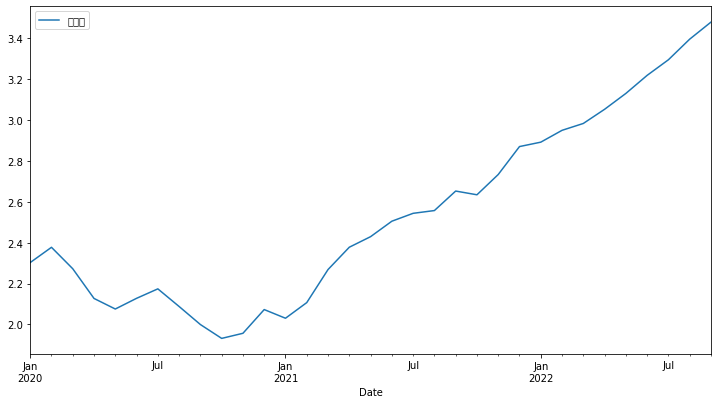

In [ ]:
df[c1].plot(figsize=(12.2,6.4))

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46160 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_

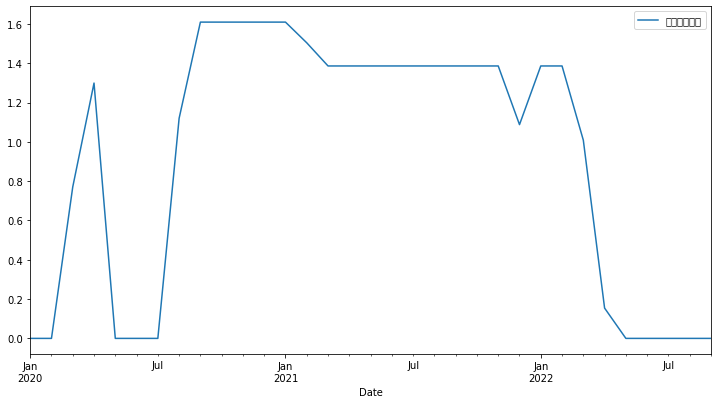

In [ ]:
df[c2].plot(figsize=(12.2,6.4))

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_

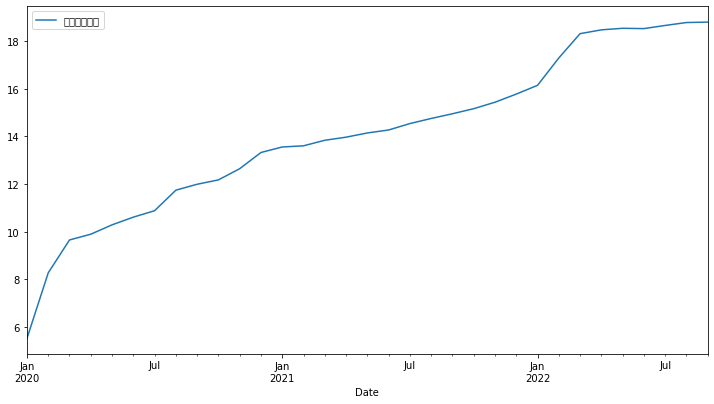

In [ ]:
df[c3].plot(figsize=(12.2,6.4))

In [ ]:
n_obs = 1
df_train, df_test = df[0:-n_obs], df[-n_obs:]

def adf_test(df):
  result= adfuller(df.values)
  print('ADF Statistics; %f' % result[0])
  print('p-value: %f'% result[1])
  print('Critical values:')
  for key, value in result[4].items():
    print('\t%s: %.3f' %(key, value))

print('ADF Test: 매출액')
adf_test(df_train['매출액'])
print('ADF Test: 거리두기단계')
adf_test(df_train['거리두기단계'])
print('ADF Test: 누적확진자수')
adf_test(df_train['누적확진자수'])

ADF Test: 매출액
ADF Statistics; 0.181520
p-value: 0.971206
Critical values:
	1%: -3.770
	5%: -3.005
	10%: -2.643
ADF Test: 거리두기단계
ADF Statistics; -1.816627
p-value: 0.372238
Critical values:
	1%: -3.661
	5%: -2.961
	10%: -2.619
ADF Test: 누적확진자수
ADF Statistics; -0.944386
p-value: 0.773004
Critical values:
	1%: -3.679
	5%: -2.968
	10%: -2.623


In [ ]:
from statsmodels.tsa.stattools import kpss

def kpss_test(df):
  statistic, p_value, n_lags, critical_values =kpss(df.values)
  print(f'KPSS Statistis: {statistic}')
  print(f'p-value: {p_value}')
  print(f'num lags: {n_lags}')
  print('Critical Values:')
  for key, value in critical_values.items():
    print(f' {key}:{value}')

print('KPSS Test: 매출액')
kpss_test(df_train['매출액'])
print('KPSS Test: 거리두기단계')
kpss_test(df_train['거리두기단계'])
print('KPSS Test: 누적확진자수')
kpss_test(df_train['누적확진자수'])

KPSS Test: 매출액
KPSS Statistis: 0.233164931895918
p-value: 0.1
num lags: 9
Critical Values:
 10%:0.347
 5%:0.463
 2.5%:0.574
 1%:0.739
KPSS Test: 거리두기단계
KPSS Statistis: 0.32711846478849477
p-value: 0.1
num lags: 9
Critical Values:
 10%:0.347
 5%:0.463
 2.5%:0.574
 1%:0.739
KPSS Test: 누적확진자수
KPSS Statistis: 0.3817833531981188
p-value: 0.08500717534563845
num lags: 9
Critical Values:
 10%:0.347
 5%:0.463
 2.5%:0.574
 1%:0.739


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1911: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1911: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value re

scale


차분

In [ ]:
df=df.diff()

In [ ]:
df=df.dropna()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text

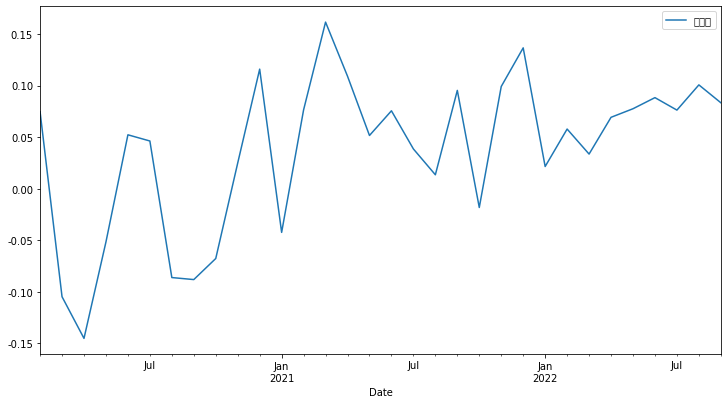

In [ ]:
df[c1].plot(figsize=(12.2,6.4))

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46160 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_

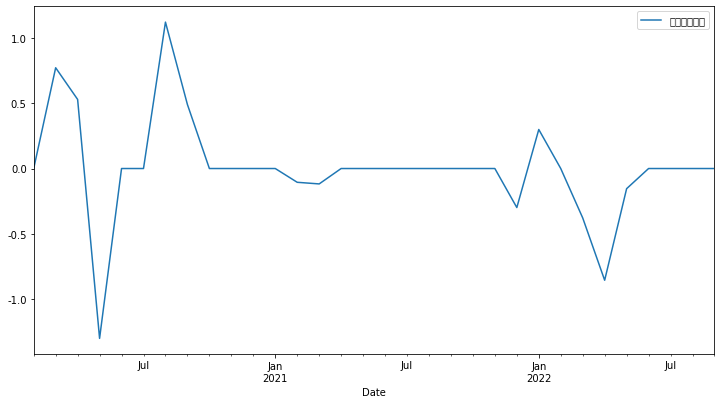

In [ ]:
df[c2].plot(figsize=(12.2,6.4))

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_

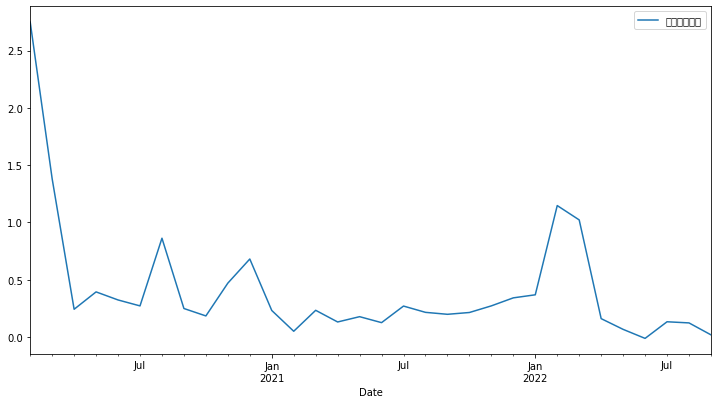

In [ ]:
df[c3].plot(figsize=(12.2,6.4))

In [ ]:
n_obs = 1
df_train, df_test = df[0:-n_obs], df[-n_obs:]

def adf_test(df):
  result= adfuller(df.values)
  print('ADF Statistics; %f' % result[0])
  print('p-value: %f'% result[1])
  print('Critical values:')
  for key, value in result[4].items():
    print('\t%s: %.3f' %(key, value))

print('ADF Test: 매출액')
adf_test(df_train['매출액'])
print('ADF Test: 거리두기단계')
adf_test(df_train['거리두기단계'])
print('ADF Test: 누적확진자수')
adf_test(df_train['누적확진자수'])

ADF Test: 매출액
ADF Statistics; -2.902087
p-value: 0.045106
Critical values:
	1%: -3.770
	5%: -3.005
	10%: -2.643
ADF Test: 거리두기단계
ADF Statistics; -4.664654
p-value: 0.000098
Critical values:
	1%: -3.670
	5%: -2.964
	10%: -2.621
ADF Test: 누적확진자수
ADF Statistics; -5.223509
p-value: 0.000008
Critical values:
	1%: -3.679
	5%: -2.968
	10%: -2.623


In [ ]:
from statsmodels.tsa.stattools import kpss

def kpss_test(df):
  statistic, p_value, n_lags, critical_values =kpss(df.values)
  print(f'KPSS Statistis: {statistic}')
  print(f'p-value: {p_value}')
  print(f'num lags: {n_lags}')
  print('Critical Values:')
  for key, value in critical_values.items():
    print(f' {key}:{value}')

print('KPSS Test: 매출액')
kpss_test(df_train['매출액'])
print('KPSS Test: 거리두기단계')
kpss_test(df_train['거리두기단계'])
print('KPSS Test: 누적확진자수')
kpss_test(df_train['누적확진자수'])

KPSS Test: 매출액
KPSS Statistis: 0.3655902973283843
p-value: 0.09198694080673092
num lags: 9
Critical Values:
 10%:0.347
 5%:0.463
 2.5%:0.574
 1%:0.739
KPSS Test: 거리두기단계
KPSS Statistis: 0.35526883329317704
p-value: 0.09643584771845817
num lags: 9
Critical Values:
 10%:0.347
 5%:0.463
 2.5%:0.574
 1%:0.739
KPSS Test: 누적확진자수
KPSS Statistis: 0.3349709579644196
p-value: 0.1
num lags: 9
Critical Values:
 10%:0.347
 5%:0.463
 2.5%:0.574
 1%:0.739


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1911: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning
